Información del Proyecto:
Trabajamos como analistas para la empresa Zuber, una empresa de viajes en Chicago. La tarea del proyecto es encontrar patrones de información en una base de datos. Se tienen que analizar datos de diferentes empresas competidoras y probar una hipótesis sobre el impacto del clima los días sábados.

In [107]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math

In [108]:
df_result01 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_result04 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_result07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [68]:
print(df_result01.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [69]:
print(df_result04.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [70]:
print(df_result07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


 1.0 El DataFrame 'df_result01' contiene 64 filas y 2 columnas.
 
 1.1 No tiene valores nulos y el tipo de cada columna son correctos.

2.0 El DataFrame 'df_result04' contiene 94 filas y 2 columnas.

2.1 No tiene valores nulos y el tipo de cada columna son correctos.

In [71]:
#De todas maneras nos vamos a asegurar de que los tipo de datos sean correctos
df_result01['company_name'] = df_result01['company_name'].astype(str)
df_result01['trips_amount'] = df_result01['trips_amount'].astype(int)

In [72]:
df_result04['dropoff_location_name'] = df_result04['dropoff_location_name'].astype(str)
df_result04['average_trips'] = df_result04['average_trips'].astype(float)

In [73]:
df_result07['start_ts'] = pd.to_datetime(df_result07['start_ts'])
df_result07['weather_conditions'] = df_result07['weather_conditions'].astype(str)
df_result07['duration_seconds'] = df_result07['duration_seconds'].astype(float)

In [74]:
#Verificamos si los el Dataframe df_result01 cuenta con registros duplicados
duplicates_df_result01 = df_result01.duplicated().sum()
print(duplicates_df_result01)

0


In [75]:
#Verificamos si los el Dataframe df_result04 cuenta con registros duplicados
duplicates_df_result04 = df_result04.duplicated().sum()
print(duplicates_df_result04)

0


In [76]:
#Verificamos si los el Dataframe df_result07 cuenta con registros duplicados
duplicates_df_result07 = df_result07.duplicated().sum()
print(duplicates_df_result07)

197


In [77]:
# Procedemos a eliminar los resultados duplicados en df_result07
df_result07 = df_result07.drop_duplicates()
print(df_result07.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None


In [78]:
duplicates_df_result07 = df_result07.duplicated().sum()
print(duplicates_df_result07)

0


In [79]:
# Identificando los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods = df_result04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [80]:
#Identificando las 10 principales empresas de taxi
top_10_companies = df_result01.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


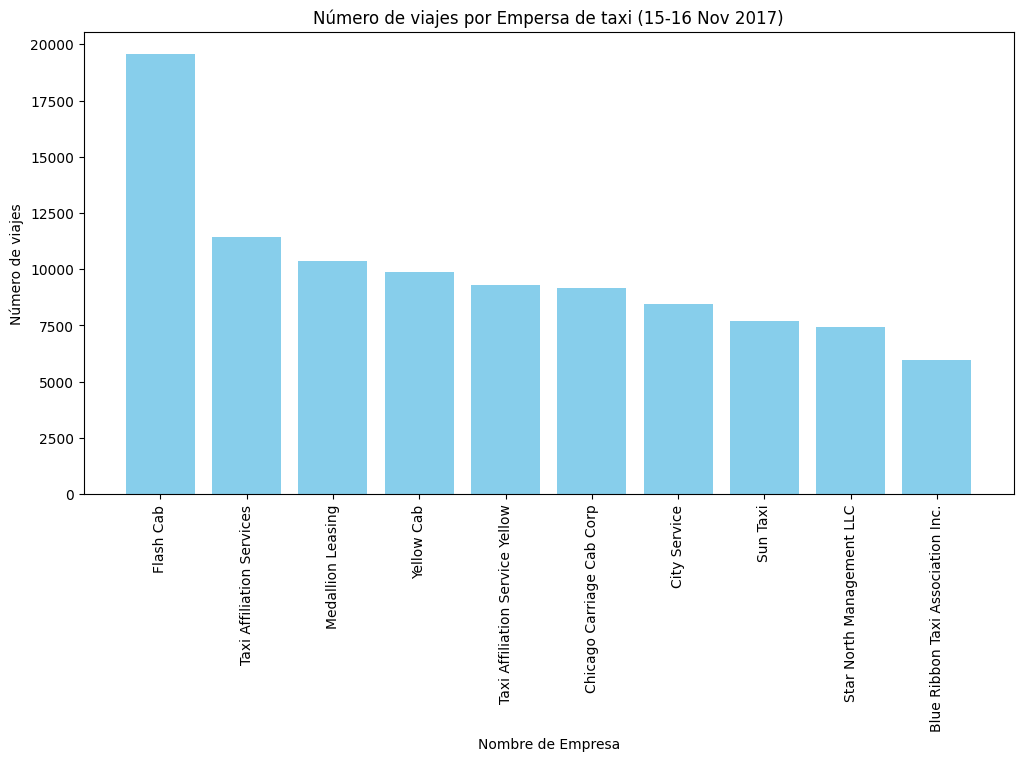

In [81]:
# Gráficos de empresas de taxis y números de viajes
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='skyblue')
plt.xlabel('Nombre de Empresa')
plt.ylabel('Número de viajes')
plt.title('Número de viajes por Empersa de taxi (15-16 Nov 2017)')
plt.xticks(rotation=90)
plt.yscale('linear')
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

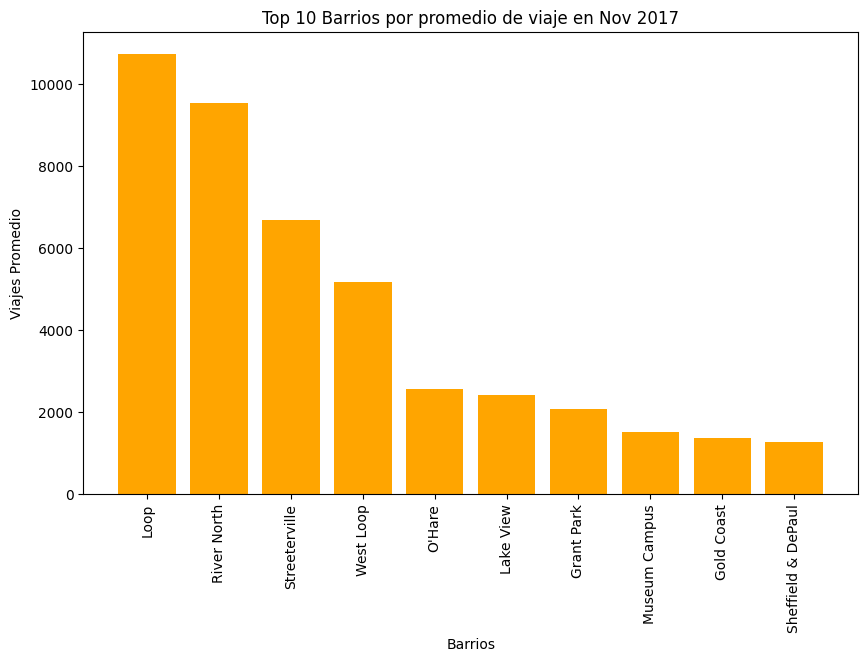

In [82]:
# Gráfico de los 10 barrios principales de acuerdo al número de finalizaciones
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='orange')
plt.xlabel('Barrios')
plt.ylabel('Viajes Promedio')
plt.title('Top 10 Barrios por promedio de viaje en Nov 2017')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

Conclusiones de los gráficos:

1. Del gráfico 'Número de viajes por Empersa de taxi (15-16 Nov 2017)'. La empresa Flash cab es la empresa con mayor cantidad de viajes, casi 2000. Seguida por Taxi Affiliation Service y Mediallion Leasing. Lo que significa una preferencia de los clientes por estas 3 compañias, pueda ser debido al buen servicio, la calidad de los taxis, la cantidad de taxis y una buena estrategia de marketing.

2. Del gráfico 'Top 10 Barrios por promedio de viaje en Nov 2017'. Los barrios con mayor finalizaciones de viajes son Loop con mas de 10000, seguidos por River North y Streeteville. Esto puede deberse a la cantidad de densidad poblacional de los barrios y/o lugares de interes como oficinas, restaurantes, centros comerciales y otro tipo de negocios.

# 5. Prueba de Hipótesis

In [83]:
df_result07 = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_result07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [84]:
# Nos aseguramos que los datos no tengan valores nulos
df_result07['duration_seconds'] = df_result07['duration_seconds'].fillna(df_result07['duration_seconds'].mean())
df_result07['weather_conditions'] = df_result07['weather_conditions'].fillna('Unknown')

In [85]:
# Nos aseguramos de rellenar los valores nulos en 'start_ts' y convertimos a formato datetime
df_result07 = df_result07.dropna(subset=['start_ts'])
df_result07['start_ts'] = pd.to_datetime(df_result07['start_ts'])

In [86]:
#Creamos una columna para identificar los días sábados 
df_result07['is_saturday'] = df_result07['start_ts'].dt.dayofweek == 5

In [87]:
df_result07.groupby(["weather_conditions", df_result07['start_ts'].dt.dayofweek.rename("dow")]).size()

weather_conditions  dow
Bad                 5      180
Good                5      888
dtype: int64

In [88]:
#Creamos una columna para identificar los días lluviosos
df_result07['is_rainy'] = df_result07['weather_conditions'].str.contains('Bad', case=False)

In [89]:
df_result07['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [90]:
print(df_result07.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   is_saturday         1068 non-null   bool          
 4   is_rainy            1068 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(1)
memory usage: 35.5+ KB
None


In [91]:
# Filtramos los viajes de días sábado con lluvia
saturday_rainy = df_result07[(df_result07['is_saturday']) & (df_result07['is_rainy'])]['duration_seconds']

In [92]:
# Filtramos los viajes que no ocurrieron los días sábado con lluvia
other_days = df_result07[~((df_result07['is_saturday']) & (df_result07['is_rainy']))]['duration_seconds']

In [93]:
#Verificamos si todavía hay valores nulos después de la limpieza
print(f"Valores nulos en saturday_rainy: {saturday_rainy.isnull().sum()}")
print(f"Valores nulos en other_days: {other_days.isnull().sum()}")

Valores nulos en saturday_rainy: 0
Valores nulos en other_days: 0


In [95]:
#Verificamos la longitud de los grupos
print(f"Número de datos en sábados lluviosos: {len(saturday_rainy)}")
print(f"Número de datos en sábados con buen clima: {len(other_days)}")

Número de datos en sábados lluviosos: 180
Número de datos en sábados con buen clima: 888


In [104]:
#Realizamos la prueba de Levene para verificar la igualdad de varianzas
levene_stat, levene_p = st.levene(saturday_rainy, other_days)

alpha = 0.05

print(f"Levene test estadístico: {levene_stat}, p-value: {levene_p}")

equal_var = levene_p > alpha

Levene test estadístico: 0.38853489683656073, p-value: 0.5332038671974493


In [105]:
#Realizamos la prueba st.ttest_ind ahora que tenemos el valor de "equal_var"
t_stat, p_value = st.ttest_ind(saturday_rainy, other_days, equal_var=equal_var)

alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes en sábados lluviosos es significativamente diferente.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración promedio de los viajes en sábados lluviosos es significativamente diferente.")

T-statistic: 6.946177714041499, P-value: 6.517970327099473e-12
Rechazamos la hipótesis nula. La duración promedio de los viajes en sábados lluviosos es significativamente diferente.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

Conclusión de Hipótesis:

1. Primero me aseguré de que los datos no tengan valores nulos o vacíos.
2. Segundo creé las columnas 'is_saturday' e 'is_rainy' para luego combinarlas y encontrar los resultados esperados.
3. Utilicé la prueba de Levene como complemento para identificar los valores en las varianzas y de acuerdo a los resultados obtenidos utilizaremos la prueba de hipótesis st.ttest_ind para darle el valor indicado a equal_var.
3. Realicé  la Hipótesis st.ttest_ind de muestras independientes para comparar datos en los dos grupos, en este caso la duración promedio de viajes los sábados en codiciones de lluvia y con la duración promedio de los viajes en otros días. Esta fórmula se utiliza para muestras independientes que toman en cuenta las medias, las varianzas y los tamaños de muestra de cada grupo, ya que este tipo de prueba de hipótesis es adecuada para tamaños de muestra pequeños a medianos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. 

    